<a href="https://colab.research.google.com/github/sibyjackgrove/SolarPV-DER-simulation-utility/blob/master/examples/PV-DER_usage_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and usage

## Installation from repository
Users can download the `SolarPV-DER-simulation-utility` repository and install with `pip`. Note that if the installation is done in a Google Colab environment, the kernel need to be restarted before importing the (otherwise you will get a module import error).

In [ ]:
import os
try:
    import pvder
except ImportError:
    !git clone https://github.com/sibyjackgrove/SolarPV-DER-simulation-utility.git
        
    if os.path.exists(os.path.join(os.getcwd(), 'SolarPV-DER-simulation-utility')):
        %cd SolarPV-DER-simulation-utility
        !pip install -e .
        %cd ..

## Basic usage

### Import classes
Import classes neccessary to define instances of the PV-DER model, events, simulation, and results.

In [1]:
#Import PV-DER modules
from pvder.DER_components_single_phase import SolarPV_DER_SinglePhase
from pvder.DER_components_three_phase  import SolarPV_DER_ThreePhase
from pvder.grid_components import Grid
from pvder.dynamic_simulation import DynamicSimulation
from pvder.simulation_events import SimulationEvents
from pvder.simulation_utilities import SimulationUtilities,SimulationResults
from pvder import utility_functions

#Import Python modules
import numpy as np
import scipy as sci
import matplotlib as matplotlib
print('Scipy version:',sci.__version__)
print('Numpy version:',np.__version__)
print('Matplotlib version:',matplotlib.__version__)
#To show interactive plot in the notebook cell
%matplotlib inline    

('Scipy version:', '1.2.1')
('Numpy version:', '1.16.2')
('Matplotlib version:', '2.0.2')


### Create objects required to simulate either single phase or three phase PV-DER

In [16]:
SINGLE_PHASE = False
events1 = SimulationEvents()
grid1 = Grid(events=events1,unbalance_ratio_b=1.0,unbalance_ratio_c=1.0)
if SINGLE_PHASE:
    PV_DER1 = SolarPV_DER_SinglePhase(grid_model=grid1,events=events1,Sinverter_rated = 10.0e3,standAlone = True,STEADY_STATE_INITIALIZATION=True)
else:
    PV_DER1 = SolarPV_DER_ThreePhase(grid_model=grid1,events=events1,Sinverter_rated = 50.0e3,standAlone = True,STEADY_STATE_INITIALIZATION=True)
sim1 = DynamicSimulation(grid_model=grid1,PV_model=PV_DER1,events = events1)
results1 = SimulationResults(simulation = sim1,PER_UNIT=True)

### Add or remove events during simulation

In [17]:
#Solar insolation event
events1.add_solar_event(3,90,298.15)

#Voltage sag event
events1.add_grid_event(6.0,Vgrid=0.98,Vgrid_angle =0.0,fgrid=60.0)
#Voltage rise event
events1.add_grid_event(7.0,Vgrid=1.01,Vgrid_angle =0.0,fgrid=60.0)

#Remove events if needed
#events1.remove_solar_event(3)
#events1.remove_grid_event(5)
#events1.remove_grid_event(6)
#events1.remove_load_event(7)


### Show events

In [18]:
events1.show_events()

Showing all event in events instance events_3
Total solar events:1
Total grid events:2
t:3.000,Solar event, Solar insolation is 90.00 W/cm2, Temperature is 298.15
t:6.000, Grid event, Grid voltage: Magnitude:0.98, Angle:0.000 V, Frequency is 60.00
t:7.000, Grid event, Grid voltage: Magnitude:1.01, Angle:0.000 V, Frequency is 60.00


### Specify run time flags, simulation time, and run simulation 

In [19]:
#%%time
PV_DER1.MPPT_ENABLE=False
PV_DER1.RAMP_ENABLE = False
PV_DER1.VOLT_VAR_ENABLE = False
PV_DER1.LVRT_ENABLE = False
PV_DER1.LFRT_ENABLE = False
PV_DER1.DO_EXTRA_CALCULATIONS = True
sim1.jacFlag = True
sim1.DEBUG_SIMULATION = False
sim1.DEBUG_VOLTAGES = True
sim1.DEBUG_CURRENTS = True
sim1.DEBUG_POWER = False
sim1.DEBUG_CONTROLLERS  = True
sim1.DEBUG_PLL = False
sim1.PER_UNIT = True
sim1.DEBUG_SOLVER  = True
sim1.tStop = 20.0
sim1.tInc = 0.001
sim1.run_simulation()
PV_DER1.validate_model()
PV_DER1.show_PV_DER_states('voltage')
PV_DER1.show_PV_DER_states('current')
PV_DER1.show_PV_DER_states('power')
PV_DER1.show_PV_DER_states('duty cycle')

sim_3:Simulation started at 0.0 s and will end at 20.0 s
PVDER-3ph_3:Time:[0.0000e+00 1.0000e-03 2.0000e-03 ... 1.9998e+01 1.9999e+01 2.0000e+01],Methods:[2 2 2 ... 2 2 2],Time steps:[0.00045584 0.00151408 0.00151408 ... 0.00833333 0.00833333 0.00833333]
PVDER-3ph_3:Simulation successful for all time steps!
sim_3:Simulation was completed in 00:00:00
Active power output error:0.0000
Reactive power output error:0.0000
Inverter filter active power loss error:0.0000
Inverter filter reactive power loss error:0.0000

______PVDER-3ph_3 - Voltage_____
Vdc:550.00
Vta:247.72+7.31j V
Vtb:-117.53-218.18j V,Vtb:-130.19+210.88j V
Vtn:-0.00+0.00j V
Va:247.53+6.26j V
Vb:-118.34-217.50j V,Vc:-129.19+211.23j V
Vn:-0.00+0.00j V
Vtrms:175.24 V
Vpccrms:175.08 V

______PVDER-3ph_3 - Current_____
ia:109.98+2.78j A
ib:-52.58-96.64j A,ic:-57.40+93.85j A
In:-0.00+0.00j A
Irms:77.79 V

______PVDER-3ph_3 - Power_____
Ppv:40896.7 W
S:40896.7+171.1j VA
S_PCC:40860.4+0.0j VA

______PVDER-3ph_3 - Duty cycle_____
ma:0

### Plot results

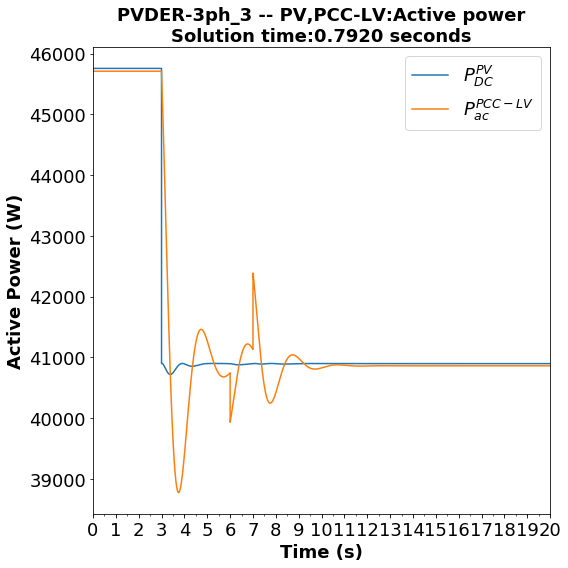

In [20]:
results1.PER_UNIT = False
results1.PLOT_TITLE = True
results1.font_size = 18
results1.plot_DER_simulation(plot_type='active_power_Ppv_Pac_PCC')#

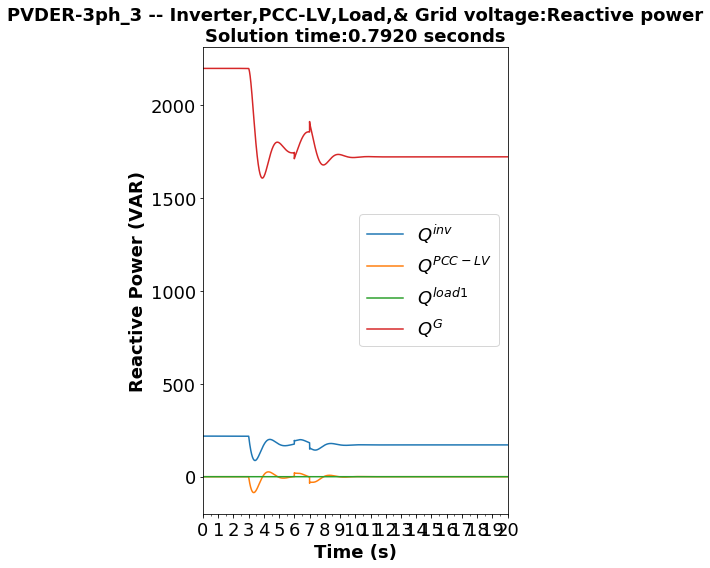

In [21]:
results1.plot_DER_simulation(plot_type='reactive_power')#_Q_PCC

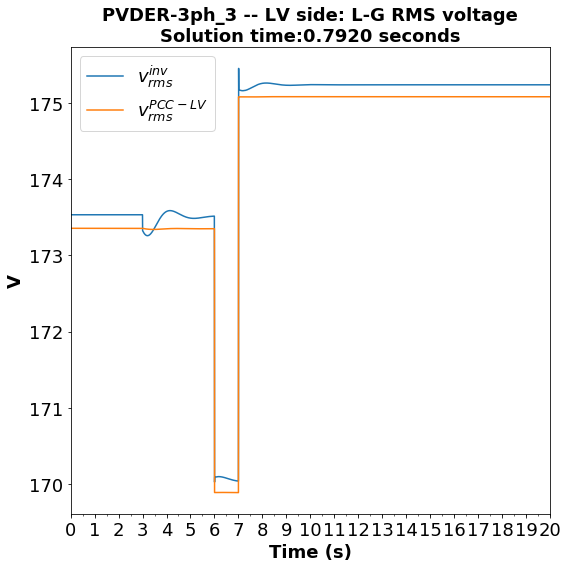

In [22]:
results1.plot_DER_simulation(plot_type='voltage_LV') #voltage_Vpcclv

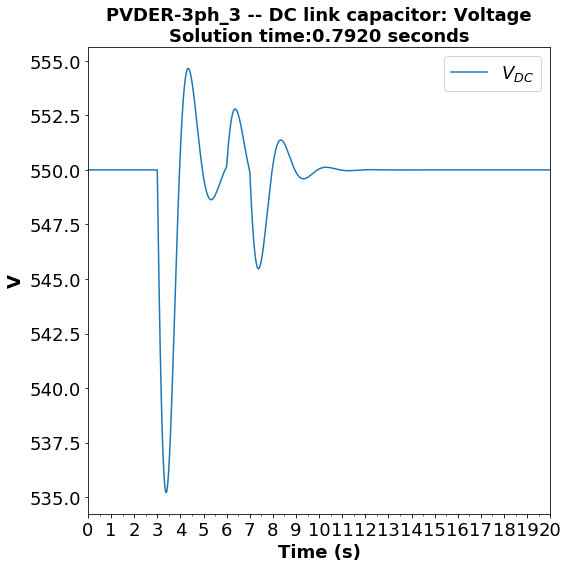

In [23]:
results1.plot_DER_simulation(plot_type='voltage_Vdc')

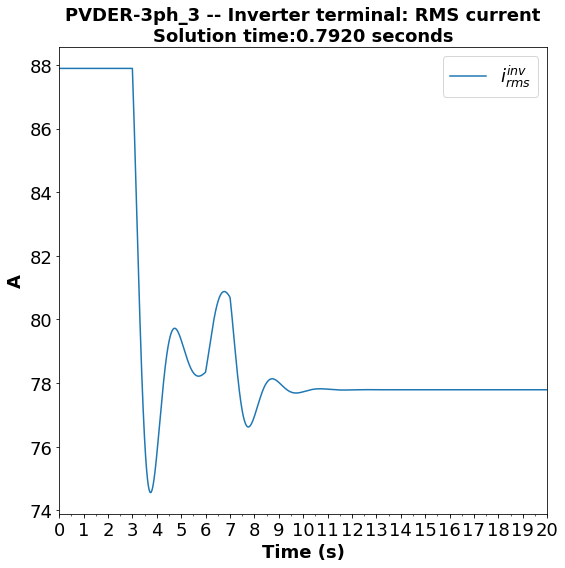

In [24]:
results1.plot_DER_simulation(plot_type='current')

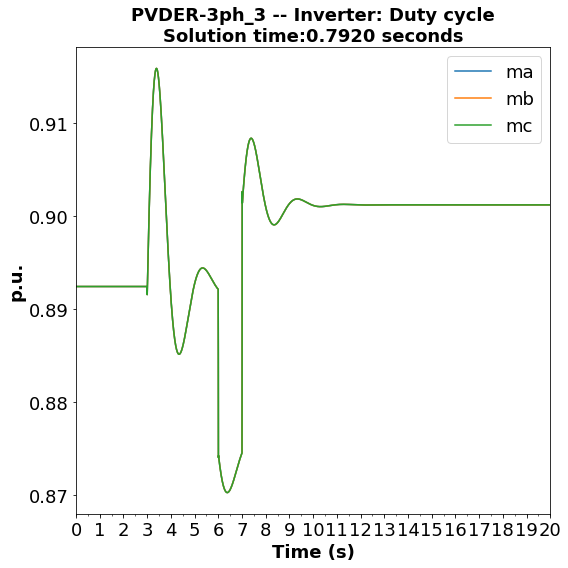

In [25]:
results1.plot_DER_simulation(plot_type='duty_cycle')